# Importing Libraries

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from skimage import feature
import pandas as pd

# Loading the Dataset

In [2]:
# Initializing Var.s

# Dataset ( after small preprocess by converting it to new one )
dataPath = './chess/train' # Contain the train and test data (will split later)
validPath = './chess/valid' # Validation data

# Image size
width = 32
height = 64

dataImages = []
dataLabels = []

In [3]:
# Read the dataset images

# Printing the labels (folders) inside the data folder
#print(os.listdir(dataPath))

print("Start to read images!\n")

# Loop through each folder inside the data folder
for dirPath in glob.glob(dataPath + "\\*"):
    label = dirPath.split("\\")[-1]
    # To calculate the total images read from every label
    totalLabelImages = 0
    # Then loop on each image inside this foler and add the images to the dataImages 
    # and it's corresponding labels to dataLabels
    for imgPath in glob.glob(os.path.join(dirPath , "*.jpg")):
        # Reading image with no colors (gray)
        img = cv2.imread(imgPath , cv2.IMREAD_GRAYSCALE)
        # Resize image
        img = cv2.resize(img, (width, height)) 
        # Extract features from image using HOG
        img = feature.hog(img)
        # Append the image and it's label
        dataImages.append(img)
        dataLabels.append(label)
        totalLabelImages += 1
    print("Total images read from " + label + " is : " + str(totalLabelImages))
        
# Convert the images and labels list to numpy array
dataImages = np.array(dataImages)
dataLabels = np.array(dataLabels)

print("\nReading Images Done!")

Start to read images!

Total images read from bishop is : 279
Total images read from king is : 324
Total images read from knight is : 363
Total images read from pawn is : 339
Total images read from queen is : 285
Total images read from rook is : 315

Reading Images Done!


# Label Encoding

In [ ]:
# Encode labels from text (folder names) to integers
encoder = LabelEncoder()
encoder.fit(dataLabels)
dataLabels = encoder.transform(dataLabels)

# Spliting the data into train and test , train size will be 85% and test size will be 15%
(x_train  , x_test ,y_train, y_test) = train_test_split(dataImages,dataLabels,test_size=0.15,random_state=42)

# Training SVM

In [5]:
# Initialize the SVM Classifier

SVM = svm.SVC(kernel='poly', random_state=17)
SVM.fit(x_train, y_train)

SVC(kernel='poly', random_state=17)

# Accuracy and Confusion matrix

SVM Images Accuracy =  0.986013986013986


<AxesSubplot:title={'center':'SVM Images'}>

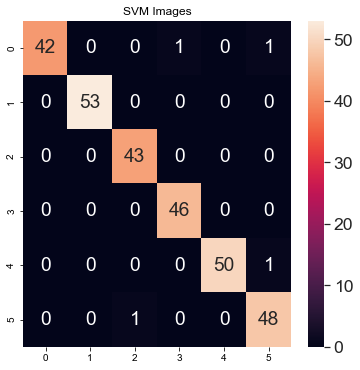

In [6]:
# Predict from the test data
predTest = SVM.predict(x_test)

# Print the accuracy of the model
print("SVM Images Accuracy = " , accuracy_score( y_test , predTest ) )

# Plot the confusion matrix
conMatrix = confusion_matrix( y_test , predTest )
fig, ax = plt.subplots(figsize=(6,6))
plt.title('SVM Images')
sns.set(font_scale=1.6)
sns.heatmap(conMatrix, annot=True, ax=ax)

# Validation

['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']
Realbishop and Predicted : bishop
Realbishop and Predicted : bishop
Realbishop and Predicted : bishop
Realbishop and Predicted : bishop
Realbishop and Predicted : bishop
Realking and Predicted : king
Realking and Predicted : king
Realking and Predicted : king
Realking and Predicted : king
Realking and Predicted : king
Realking and Predicted : king
Realknight and Predicted : knight
Realknight and Predicted : knight
Realknight and Predicted : knight
Realknight and Predicted : knight
Realknight and Predicted : knight
Realpawn and Predicted : pawn
Realpawn and Predicted : pawn
Realpawn and Predicted : pawn
Realpawn and Predicted : pawn
Realpawn and Predicted : pawn
Realpawn and Predicted : pawn
Realqueen and Predicted : queen
Realqueen and Predicted : queen
Realqueen and Predicted : queen
Realqueen and Predicted : queen
Realqueen and Predicted : queen
Realrook and Predicted : rook
Realrook and Predicted : rook
Realrook and Predicted : r

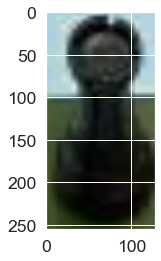

In [7]:
# Validate 

def validate(img):
    img = cv2.resize(img, (width, height)) #Resize images
    img = feature.hog(img)
    prediction = SVM.predict(img.reshape(1, -1))
    return prediction

# Read Training Images

print(os.listdir(validPath))
labels = os.listdir(validPath)

for directory_path in glob.glob(validPath + "\\*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path) #Reading color images
        imgCopy = cv2.imread(img_path , cv2.IMREAD_GRAYSCALE) #Reading color images
        
        prediction = validate(imgCopy)
        print( "Real : " + str(label) + " ------- Predicted : "+ str(labels[prediction[0]]) )
        plt.imshow(img)
        


In [8]:
#from sklearn.linear_model import SGDClassifier 
#from sklearn.model_selection import GridSearchCV
y_train_pred = SVM.decision_function(x_train)    
y_test_pred = SVM.decision_function(x_test)

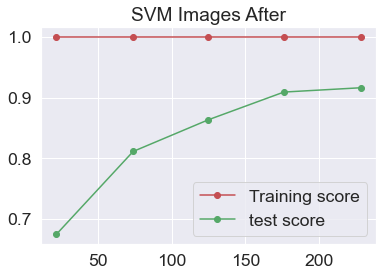

In [9]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(6,4))

train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, test_score= learning_curve(SVM,x_test,y_test,n_jobs=4,train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_score, axis=1)

plt.title('SVM Images After')
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="test score")
plt.legend()


plt.show()

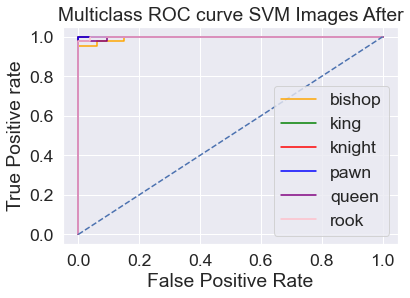

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

SVMgraph = OneVsRestClassifier(svm.SVC(decision_function_shape='ovo')) #For multiclass classification
y_score = SVMgraph.fit(x_train, y_train).decision_function(x_test)

fpr = dict()
tpr = dict()
thresh =dict()
pieces = labels


n_class = len(pieces)

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_score[:,i], pos_label=i)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='bishop')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='king')
plt.plot(fpr[2], tpr[2],linestyle='-',color='red', label='knight')
plt.plot(fpr[3], tpr[3],linestyle='-',color='blue', label='pawn')
plt.plot(fpr[4], tpr[4],linestyle='-',color='purple', label='queen')
plt.plot(fpr[5], tpr[5],linestyle='-',color='pink', label='rook')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('Multiclass ROC curve SVM Images After')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);